# Scikit Learn

In [1]:
import numpy as np
import pandas as pd
heart_disease = pd.read_csv('./heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
heart_disease.shape

(303, 14)

In [6]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

# Check the head of the features DataFrame
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [3]:
# Check the head and the value counts of the labels 
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 1    165
 0    138
 Name: target, dtype: int64)

* Train Test Split
* Suppose we have 100 entries
* Then we will split the 100 entries into training and testing dataset
* The data is splitted randomly to ensure no biasnes is present

In [7]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25, random_state=42) # by default train_test_split uses 25% of the data for the test set

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

In [8]:
# Since we're working on a classification problem, we'll start with a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [9]:
# View the current hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

* Basically the model will learn the underlying patterns
* The model will itself learn the dataset and make predictions later on

In [10]:
clf.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [11]:
# In order to predict a label, data has to be in the same shape as X_train
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


* The predict function will be used to make the prediciton on the testing dataset
* The predict function will take the dataset and make it's predictions, when provided with the 

In [12]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = clf.predict(X=X_test)

In [13]:
# Evaluate the model on the training set
train_acc = clf.score(X=X_train, y=y_train)
print(f"The model's accuracy on the training dataset is: {train_acc*100}%")

The model's accuracy on the training dataset is: 100.0%


* The above accuracy is for the training dataset and not the testing dataset
* The model is trained on this training dataset, hence it perfectly learned the dataset and performed perfectly well, and got full accuracy

In [14]:
# Evaluate the model on the test set
test_acc = clf.score(X=X_test, y=y_test)
print(f"The model's accuracy on the testing dataset is: {test_acc*100:.2f}%")

The model's accuracy on the testing dataset is: 84.21%


* The above accuracy is for the testing accuracy, which is the real accuracy

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[27,  8],
       [ 4, 37]])

* Precision & Recall

In [21]:
# Create a classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.82      0.90      0.86        41

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [18]:
# Compute the accuracy score (same as the score() method for classifiers) 
accuracy_score(y_test, y_preds)

0.8421052631578947

In [23]:
# Try different numbers of estimators (trees)... (cross-validation)
# We are trying various values for the estimators

np.random.seed(42)
for i in range(100, 200, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 100 estimators...
Model accuracy on test set: 81.58%

Trying model with 110 estimators...
Model accuracy on test set: 82.89%

Trying model with 120 estimators...
Model accuracy on test set: 82.89%

Trying model with 130 estimators...
Model accuracy on test set: 82.89%

Trying model with 140 estimators...
Model accuracy on test set: 84.21%

Trying model with 150 estimators...
Model accuracy on test set: 84.21%

Trying model with 160 estimators...
Model accuracy on test set: 85.53%

Trying model with 170 estimators...
Model accuracy on test set: 85.53%

Trying model with 180 estimators...
Model accuracy on test set: 84.21%

Trying model with 190 estimators...
Model accuracy on test set: 84.21%



80 trainig 20 testing
20 20 20 20

In [24]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(100, 200, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)

    # Measure the model score on a single train/test split
    model_score = model.score(X_test, y_test)
    print(f"Model accuracy on single test set split: {model_score * 100:.2f}%")
    
    # Measure the mean cross-validation score across 5 different train and test splits
    cross_val_mean = np.mean(cross_val_score(model, X, y, cv=5))
    print(f"5-fold cross-validation score: {cross_val_mean * 100:.2f}%")
    
    # Print the best value for the validation sets
     
    print("")

Trying model with 100 estimators...
Model accuracy on single test set split: 81.58%
5-fold cross-validation score: 82.15%

Trying model with 110 estimators...
Model accuracy on single test set split: 84.21%
5-fold cross-validation score: 81.17%

Trying model with 120 estimators...
Model accuracy on single test set split: 84.21%
5-fold cross-validation score: 83.16%

Trying model with 130 estimators...
Model accuracy on single test set split: 82.89%
5-fold cross-validation score: 83.14%

Trying model with 140 estimators...
Model accuracy on single test set split: 84.21%
5-fold cross-validation score: 82.48%

Trying model with 150 estimators...
Model accuracy on single test set split: 82.89%
5-fold cross-validation score: 80.17%

Trying model with 160 estimators...
Model accuracy on single test set split: 81.58%
5-fold cross-validation score: 80.83%

Trying model with 170 estimators...
Model accuracy on single test set split: 84.21%
5-fold cross-validation score: 81.83%

Trying model wit

In [29]:
# Another way to do it with GridSearchCV...
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over in dictionary form 
# (these can be any of your target model's hyperparameters) 
param_grid = {'n_estimators': [i for i in range(100, 200, 10)]}

# Setup the grid search
grid = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=param_grid,
                    cv=5,
                    verbose=1) 

# Fit the grid search to the data
grid.fit(X, y)

# Find the best parameters
print(f"The best parameter values are: {grid.best_params_}")
print(f"With a score of: {grid.best_score_*100:.2f}%")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameter values are: {'n_estimators': 120}
With a score of: 82.82%


In [26]:
# Set the model to be the best estimator
clf = grid.best_estimator_
clf

RandomForestClassifier(n_estimators=120)

In [27]:
# Fit the best model
clf = clf.fit(X_train, y_train)

# Find the best model scores on our single test split
# (note: this may be lower than the cross-validation score since it's only on one split of the data)
print(f"Best model score on single split of the data: {clf.score(X_test, y_test)*100:.2f}%")

Best model score on single split of the data: 80.26%


# Supervised Learning

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Loading the dataset from a csv file format
data = pd.read_csv("./breast-cancer-wisconsin.csv")

In [32]:
data.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sample  699 non-null    int64 
 1   F1      699 non-null    int64 
 2   F2      699 non-null    int64 
 3   F3      699 non-null    int64 
 4   F4      699 non-null    int64 
 5   F5      699 non-null    int64 
 6   F6      699 non-null    object
 7   F7      699 non-null    int64 
 8   F8      699 non-null    int64 
 9   F9      699 non-null    int64 
 10  Class   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [23]:
# Summarizing each column
data.describe() 
# Below we can see that the each columns' count, mean, min, max, etc. are described

,Sample,F1,F2,F3,F4,F5,F7,F8,F9,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [24]:
# For identifying the missing values we will use isna pandas method
missing_values = data.isnull()
missing_values

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


In [25]:
data = data.replace('?', np.nan)

In [26]:
print(missing_values.sum())

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64


In [27]:
# Now let's replace those values with the mean of the column    
column_means = data.mean()
column_means

data.fillna(column_means,inplace=True)

/var/folders/bd/fff86v_52892xq1pngqh2bv40000gn/T/ipykernel_99811/3416474136.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_means = data.mean()


In [28]:
# To make a frequency table we will use pandas crosstab
frequency_table = pd.crosstab(data['Class'], data['F6'])
frequency_table

F6,1,10,2,3,4,5,6,7,8,9
Class,,,,,,,,,,
2,387,3,21,14,6,10,0,1,2,0
4,15,129,9,14,13,20,4,7,19,9


In [29]:
# To make a frequency table we will use pandas crosstab
frequency_table = pd.crosstab(data['Class'], data['F6'])
frequency_table

F6,1,10,2,3,4,5,6,7,8,9
Class,,,,,,,,,,
2,387,3,21,14,6,10,0,1,2,0
4,15,129,9,14,13,20,4,7,19,9


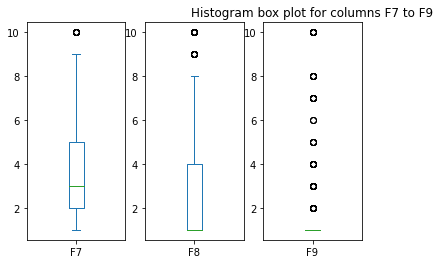

In [30]:
columns = data.iloc[:,7:10]
columns.plot(kind="box",subplots=True)
# plt.subtitle("histogram for columns F7,F8,F9") (rows=1,cols=3,figsize=(15, 8))
plt.title("Histogram box plot for columns F7 to F9")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
data

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [33]:
# The list of new heading which we need to apply
heading = ["Sample code", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"]

In [34]:
df = data
df = pd.read_csv("./breast-cancer-wisconsin.csv",header=None, skiprows=1, names=heading)
# Replacing the header row with the actual heading

In [35]:
# To find the missing values from teh dataframe
df = df.replace('?', np.nan)

In [36]:
df.isna().sum()

Sample code                     0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [37]:
# Dropping the null rows from the data
df.dropna(axis=0,inplace=True)

In [38]:
df.isna().sum()


Sample code                    0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [39]:
# Let's replace the Class values with the value of bening and malign respectively
df["Class"] = df["Class"].replace(2,"Benign")
df["Class"] = df["Class"].replace(4,"Malignant")

In [40]:
df

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,Benign
1,1002945,5,4,4,5,7,10,3,2,1,Benign
2,1015425,3,1,1,1,2,2,3,1,1,Benign
3,1016277,6,8,8,1,3,4,3,7,1,Benign
4,1017023,4,1,1,3,2,1,3,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,Benign
695,841769,2,1,1,1,2,1,1,1,1,Benign
696,888820,5,10,10,3,7,3,8,10,2,Malignant
697,897471,4,8,6,4,3,4,10,6,1,Malignant


In [41]:
# To split the dataset into training and testing set
X = df.drop(["Sample code" ,"Class"],axis=1) # Let's remove the value to be predicted and the serial number from the data
y = df["Class"] # The output will be Class column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
# Normalizing the data using min max scaling
X_train = pd.DataFrame(MinMaxScaler().fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(MinMaxScaler().fit_transform(X_test),columns=X_test.columns)

In [43]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [44]:
y.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Class, dtype: object

In [45]:
# To implement knn model for the classification
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

In [46]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for 3 neighbors is {accuracy:.4f}")

Accuracy for 3 neighbors is 0.9707


In [47]:
m3 = confusion_matrix(y_test,y_pred)
m3

array([[120,   5],
       [  1,  79]])

In [48]:
# Let's use 5 neighbours
knn_classifier5 = KNeighborsClassifier(n_neighbors=5)
knn_classifier5.fit(X_train, y_train)
y_pred5 = knn_classifier5.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred5)
print(f"Accuracy for 5 neighbors is {accuracy:.4f}")

Accuracy for 5 neighbors is 0.9659


In [50]:
m5 = confusion_matrix(y_test,y_pred5)
m5

array([[120,   5],
       [  2,  78]])

In [51]:
# Let's use 10 neighbours
knn_classifier10 = KNeighborsClassifier(n_neighbors=10)
knn_classifier10.fit(X_train, y_train)
y_pred10 = knn_classifier10.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred10)
print(f"Accuracy for 10 neighbors is {accuracy:.4f}")

Accuracy for 10 neighbors is 0.9707


In [53]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# To implement Naive Bayes categorical model for the classification of dataset

nb_cat = CategoricalNB()
nb_cat.fit(X_train, y_train)
y_pred=nb_cat.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Categorical Naive Bayes is {accuracy:.4f}")

Accuracy for Categorical Naive Bayes is 0.9268


In [55]:
# Confusion matrix for Categorical naive bayes model
print(confusion_matrix(y_test,y_pred))

[[122   3]
 [ 12  68]]


In [56]:
# To implement Gaussian Naive Bayes model 

nb_gauss = GaussianNB()
nb_gauss.fit(X_train, y_train)
y_pred_nb_gauss = nb_gauss.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred_nb_gauss)
print(f"Accuracy for Gaussian Naive Bayes is {accuracy:.4f}")

Accuracy for Gaussian Naive Bayes is 0.9512


In [58]:
# Confusion matrix for Gaussian naive bayes model
print(confusion_matrix(y_test,y_pred_nb_gauss))

[[115  10]
 [  0  80]]


In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
# To implement CART Decision Tree model for the classification of dataset

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for CART Decision Tree is {accuracy:.4f}")

Accuracy for CART Decision Tree is 0.9268


In [62]:
# To implement CART Decision Tree model for the classification of dataset
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Random Forest Classifier is {accuracy:.3f}")

Accuracy for Random Forest Classifier is 0.951


In [64]:
# Let's identify important features
print(pd.Series(rf.feature_importances_,index=X.columns))

Clump Thickness                0.042366
Uniformity of Cell Size        0.255195
Uniformity of Cell Shape       0.181687
Marginal Adhesion              0.028345
Single Epithelial Cell Size    0.056656
Bare Nuclei                    0.211491
Bland Chromatin                0.127009
Normal Nucleoli                0.089085
Mitoses                        0.008165
dtype: float64
